# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

In [ ]:
! git clone https://github.com/vrhughes/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 79 (delta 28), reused 10 (delta 8), pack-reused 41 (from 1)
Receiving objects: 100% (79/79), 2.84 MiB | 5.83 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [ ]:
# importing stuff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


**Q0.** Please answer the following questions in your own words.

1.   What makes a model "linear"? "Linear" in what?
A model is linear if there is only one independent variable, x, that describes the dependent variable, y.

In the equation x is only to the first power and it has one coefficient in front of it (this could be one also). There can also be an additional constant, the intercept, but that is not necessary.

2.   How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)

I interpret it as an indicator of how much the variable is influenced/"weighted" by the model. Of course, if you get 0 then there is no effect on the model.

3.   Can linear regression be used for classification? Explain why, or why not.

I mean, hypothetically you can do anything... Is it what you should do? In this case, probably not. Linear regression deals with continuous values while classification is oriented more towards categories and discrete values.

4.   What are signs that your linear model is over-fitting?

Signs of overfitting include drastic changes in y with small changes in x, and the training set having a low error rate while the test set has a high error rate.

5.   Clearly explain multi-colinearity using the two-stage least squares technique.

Multi-colinearity happens when you have 1+ independent variables that are correlated to each other. This correlation among variables makes it harder to figure out what influence a specific variable has on the model's output (vs the correlation to other inputs).
The two stage least squares technique uses new variables that are correlated to the independent variable(s) but not the error term. This allows for a more reliable coefficient calculations.

6.   What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable *y* and your features/control/response/independent variables *x*?

One way is to add an explanatory variable that is either a log of your original variable (or arcsinh), this is usually good to base off of a scatterplot of your original variable. Second, you can use polynomial functions (same sort of process as above).

7.   What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

The intercept is what the model will equal when all inputs are 0 or insignificantly small, essentially it's your automatic starting value.
The slope coefficient for a variable is the rate of change that the output changes with the input.
The coefficient for a dummy variable is similar to that of a normal variable, but it depends on whether the dummy is ON or OFF (DIGITAL INPUT) as 1 or 0.

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [ ]:
# Question 1.1
q1 = pd.read_csv('/content/linearRegression/data/Q1_clean.csv', low_memory = False)
q1.head()
q1.rename(columns = {'Neighbourhood ': 'Neighbourhood'}, inplace = True)
print(q1.head())
q1.loc[:, ['Price', 'Neighbourhood']].groupby('Neighbourhood').describe()

   Price  Review Scores Rating Neighbourhood Property Type        Room Type
0    549                  96.0     Manhattan     Apartment     Private room
1    149                 100.0      Brooklyn     Apartment  Entire home/apt
2    250                 100.0     Manhattan     Apartment  Entire home/apt
3     90                  94.0      Brooklyn     Apartment     Private room
4    270                  90.0     Manhattan     Apartment  Entire home/apt


Price                                                      \
                 count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                
Bronx            217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn        8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan      11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens          1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island     96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                        
                   max  
Neighbourhood           
Bronx            244.0  
Brooklyn        4500.0  
Manhattan      10000.0  
Queens           950.0  
Staten Island   5000.0

On average the most expensive borough is Manhattan with a mean of 183.

In [ ]:
# Question 1.1
q1.loc[:, ['Neighbourhood', 'Review Scores Rating']].groupby('Neighbourhood').describe()

Review Scores Rating                                         \
                             count       mean       std   min   25%   50%   
Neighbourhood                                                               
Bronx                        217.0  91.654378  8.169239  60.0  88.0  93.0   
Brooklyn                    8487.0  92.363497  8.656563  20.0  90.0  94.0   
Manhattan                  11763.0  91.801496  8.840889  20.0  88.0  93.0   
Queens                      1590.0  91.549057  9.895860  20.0  88.0  94.0   
Staten Island                 96.0  90.843750  9.137923  40.0  87.0  92.0   

                             
                 75%    max  
Neighbourhood                
Bronx           99.0  100.0  
Brooklyn       100.0  100.0  
Manhattan       99.0  100.0  
Queens         100.0  100.0  
Staten Island   97.0  100.0

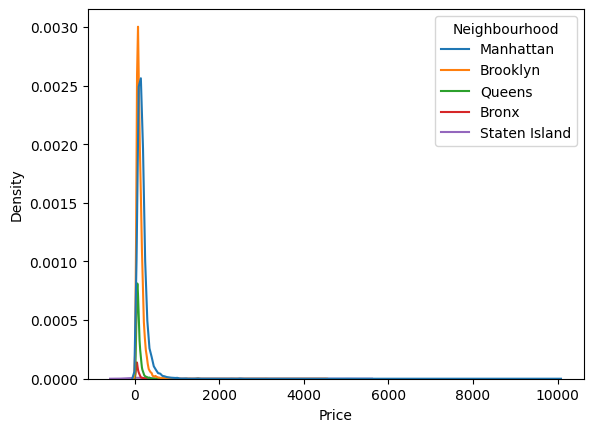

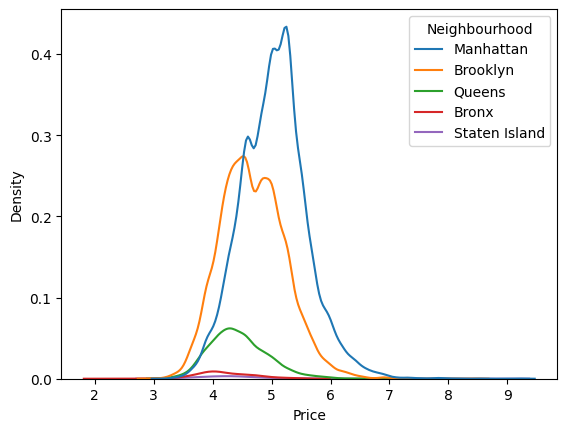

In [ ]:
# Question 1.1
sns.kdeplot(data = q1, x = 'Price', hue = 'Neighbourhood')
plt.show()

sns.kdeplot(data = q1, x = np.log(q1['Price']), hue = 'Neighbourhood')
plt.show()

In [ ]:
# Question 1.2
y = q1['Price']
x = pd.get_dummies(q1['Neighbourhood'], dtype = 'int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept = False).fit(x, y) # regression made

outputs = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient':reg.coef_})
outputs

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


In [ ]:
# Question 1.3
y2 = q1['Price']
x2 = pd.get_dummies(q1['Neighbourhood'], dtype = 'int', drop_first = True)

reg2 = linear_model.LinearRegression().fit(x2, y2) # regression 2 made

outputs2 = pd.DataFrame({'variable':reg2.feature_names_in_, 'coefficient':reg2.coef_})
outputs2

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [ ]:
# Question 1.3
print('The intercept is ' + str(reg2.intercept_))

The intercept is 75.27649769585331


The second time the Bronx was droppped from the table :(, its coefficient from the first regression became the intercept. All of the coefficients for the second regression are relative to the Bronx! You can get the coefficients in part 2 from the newer coefficients by adding the intercept value to each coefficient value in the table.

In [ ]:
# Question 1.4
x = q1.loc[:, ['Review Scores Rating', 'Neighbourhood']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

Z_train = pd.concat([x_train['Review Scores Rating'], pd.get_dummies(x_train['Neighbourhood'], dtype = 'int')], axis = 1)
Z_test = pd.concat([x_test['Review Scores Rating'], pd.get_dummies(x_test['Neighbourhood'], dtype = 'int')], axis = 1)

reg3 = linear_model.LinearRegression(fit_intercept = False).fit(Z_train, y_train) # regression 3

y_hat = reg3.predict(Z_test)
print('R^2 = ' + str(reg3.score(Z_test, y_test)))
print('RMSE = ' + str(np.sqrt(np.mean((y_hat - y_test)**2 )) ) )

outputs3 = pd.DataFrame({'variable':reg3.feature_names_in_, 'coefficient':reg3.coef_})
outputs3

R^2 = 0.06701086106947296
RMSE = 125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


The most expensive kind of property you can rent is a perfectly rated Manhattan place (x=100%) for approximately 193 dollars a night (100*1.032257 + 89.421020).

In [ ]:
# Question 1.5
x5 = q1.loc[:, ['Review Scores Rating', 'Neighbourhood', 'Room Type']]
x_train, x_test, y_train, y_test = train_test_split(x5, y, test_size = 0.2, random_state = 100)

Z_train = pd.concat([x_train['Review Scores Rating'], pd.get_dummies(x_train['Neighbourhood'], dtype = 'int'), pd.get_dummies(x_train['Room Type'], dtype = 'int')], axis = 1)
Z_test = pd.concat([x_test['Review Scores Rating'], pd.get_dummies(x_test['Neighbourhood'], dtype = 'int'), pd.get_dummies(x_test['Room Type'], dtype = 'int')], axis = 1)

reg5 = linear_model.LinearRegression(fit_intercept = False).fit(Z_train, y_train) # regression 3

y_hat = reg5.predict(Z_test)
print('R^2 = ' + str(reg5.score(Z_test, y_test)))
print('RMSE = ' + str(np.sqrt(np.mean((y_hat - y_test)**2 )) ) )

outputs5 = pd.DataFrame({'variable':reg5.feature_names_in_, 'coefficient':reg5.coef_})
outputs5

R^2 = 0.22035348129282306
RMSE = 114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


The most expensive property you can rent is a perfectly rated entire home/apartment in Manhattan (110.617820+53.693304+100*0.626912) which is approximately 227.002324 dollars a night.

Question 1.6: What does the coeff on 'Review Scores Rating' mean if it changes from part 4 to 5?

From above we know that in part 4 the coeff of Review Scores Ratings was 1.032257 and then in part 5 it was 0.626912 when we added Room Type as a variable. This means that some of the differentiation in prices by review scores and neighbourhood has to do with the room type options. When room type is controlled the other variables become less influential because some of their predictive power is correlated to room type.

---


**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?